In [1]:
from fastai.vision import *

In [2]:
path = Path('/home/shakti/datasets/open_images/food_no_food2/')
bs = 32

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, num_workers=4, bs = bs).normalize(imagenet_stats)

In [4]:
data.classes


['food', 'not_food']

In [5]:
# data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.342216,0.209530,0.087500,03:25


In [20]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (8000 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
food,food,food,food,food
Path: /home/shakti/datasets/open_images/food_no_food2;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
not_food,food,food,food,food
Path: /home/shakti/datasets/open_images/food_no_food2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, e

In [21]:
!ls

00_notebook_tutorial.ipynb     lesson3-planet.ipynb
all_food_urls.txt	       lesson4-collab.ipynb
crappify.py		       lesson4-tabular.ipynb
dataframe_urls.ipynb	       lesson5-sgd-mnist.ipynb
f_n_f_limited		       lesson6-pets-more.ipynb
FoodNoFoodClassifier.ipynb     lesson6-rossmann.ipynb
food_no_food_dataset	       lesson7-human-numbers.ipynb
image-downloader.py	       lesson7-resnet-mnist.ipynb
image_folders-Copy1.ipynb      lesson7-superres-gan.ipynb
image_folders.ipynb	       lesson7-superres-imagenet.ipynb
lesson1-pets-Copy1.ipynb       lesson7-superres.ipynb
lesson1-pets.ipynb	       lesson7-wgan.ipynb
lesson2-download.ipynb	       no_food_urls.txt
lesson2-sgd.ipynb	       rossman_data_clean.ipynb
lesson3-camvid.ipynb	       Untitled1-Copy1.ipynb
lesson3-camvid-tiramisu.ipynb  Untitled1.ipynb
lesson3-head-pose.ipynb        Untitled.ipynb
lesson3-imdb.ipynb	       urls.pkl


In [ ]:
load_learner('./ex')

In [58]:
learn.export()

In [57]:
learn.save('stage-2')

In [6]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.176448,0.156598,0.061500,03:40


In [13]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.134731,0.327800,0.110000,00:17
1,0.133624,0.326893,0.105000,00:16
2,0.119876,0.329734,0.110000,00:16


In [12]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.213428,0.252036,0.071429,00:03
1,0.189439,0.223198,0.071429,00:02


In [7]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

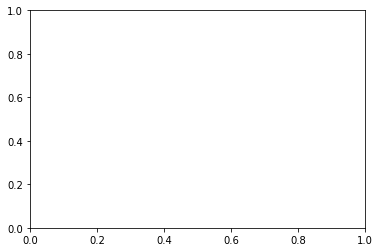

In [8]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.227399,0.251048,0.099793,02:17


FileNotFoundError: Traceback (most recent call last):
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 636, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 109, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/fastai/vision/data.py", line 270, in get
    res = self.open(fn)
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/fastai/vision/data.py", line 266, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/fastai/vision/image.py", line 393, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "/home/shakti/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 2770, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/home/shakti/course-v3/nbs/dl1/food_no_food_dataset/not_food/00000012.jpg'


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

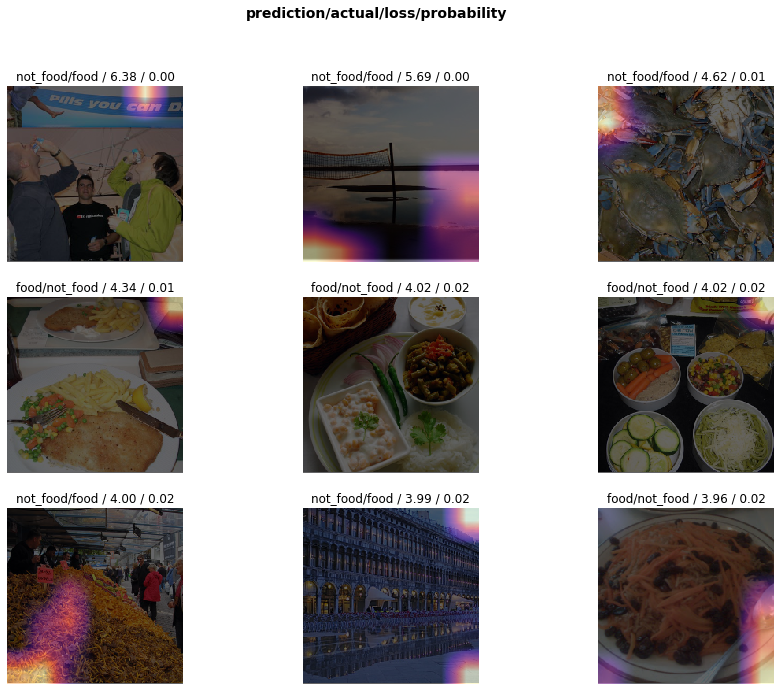

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

In [11]:
from fastai.widgets import *

In [12]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [13]:
learn.save('stage-2')

In [14]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [15]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [20]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())